In [6]:
import nltk

In [5]:
import re

In [4]:
from nltk.tokenize import word_tokenize

In [3]:
from nltk.probability import FreqDist

In [2]:
import matplotlib.pyplot as plt

ID do corpus

In [20]:
nltk_id = 'shakespeare'


In [21]:
nltk.download(nltk_id)

[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.


True

In [22]:
print(nltk.corpus.shakespeare.readme())

Shakespeare XML Corpus Sample

http://www.andrew.cmu.edu/user/akj/shakespeare/

Marked up in XML by Jon Bosak, CSS stylesheet by Ajay Juneja.

Contents:

  DTD and Stylesheet: play.dtd, shakes.css

  Books:

  a_and_c.xml - Antony and Cleopatra
  dream.xml - A Midsummer Night's Dream
  hamlet.xml - Hamlet
  j_caesar.xml - Julius Caesar
  macbeth.xml - Macbeth
  merchant.xml - The Merchant of Venice
  othello.xml - Othello
  r_and_j.xml - Romeo and Juliet



In [23]:
hamlet = nltk.corpus.shakespeare.raw('hamlet.xml')

In [24]:
print(hamlet)

<?xml version="1.0"?>
<?xml-stylesheet type="text/css" href="shakes.css"?>
<!-- <!DOCTYPE PLAY SYSTEM "play.dtd"> -->

<PLAY>
<TITLE>The Tragedy of Hamlet, Prince of Denmark</TITLE>

<!--

<P>Text placed in the public domain by Moby Lexical Tools, 1992.</P>
<P>XML markup by Jon Bosak, 1996-1998.</P>
<P>XML Styling done by Ajay Juneja, 1999.<P>
<P>This work may be freely copied and distributed worldwide.</P>

-->

<PERSONAE>
<TITLE>Dramatis Personae</TITLE>

<PERSONA>CLAUDIUS, king of Denmark. </PERSONA>
<PERSONA>HAMLET, son to the late, and nephew to the present king.</PERSONA>
<PERSONA>POLONIUS, lord chamberlain. </PERSONA>
<PERSONA>HORATIO, friend to Hamlet.</PERSONA>
<PERSONA>LAERTES, son to Polonius.</PERSONA>
<PERSONA>LUCIANUS, nephew to the king.</PERSONA>

<PGROUP>
<PERSONA>VOLTIMAND</PERSONA>
<PERSONA>CORNELIUS</PERSONA>
<PERSONA>ROSENCRANTZ</PERSONA>
<PERSONA>GUILDENSTERN</PERSONA>
<PERSONA>OSRIC</PERSONA>
<GRPDESCR>courtiers.</GRPDESCR>
</PGROUP>

<PERSONA>A Gentleman</PERSON

Vamos fazer o seguinte:
* Selecionar apenas letras (remover pontuação, números e outros caracteres)
* Converter o texto para letra minúscula

In [25]:
hamlet_letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', hamlet.lower())

In [26]:
print(hamlet_letras_min)

['xml', 'version', 'xml', 'stylesheet', 'type', 'text', 'css', 'href', 'shakes', 'css', 'doctype', 'play', 'system', 'play', 'dtd', 'play', 'title', 'the', 'tragedy', 'of', 'hamlet', 'prince', 'of', 'denmark', 'title', 'p', 'text', 'placed', 'in', 'the', 'public', 'domain', 'by', 'moby', 'lexical', 'tools', 'p', 'p', 'xml', 'markup', 'by', 'jon', 'bosak', 'p', 'p', 'xml', 'styling', 'done', 'by', 'ajay', 'juneja', 'p', 'p', 'this', 'work', 'may', 'be', 'freely', 'copied', 'and', 'distributed', 'worldwide', 'p', 'personae', 'title', 'dramatis', 'personae', 'title', 'persona', 'claudius', 'king', 'of', 'denmark', 'persona', 'persona', 'hamlet', 'son', 'to', 'the', 'late', 'and', 'nephew', 'to', 'the', 'present', 'king', 'persona', 'persona', 'polonius', 'lord', 'chamberlain', 'persona', 'persona', 'horatio', 'friend', 'to', 'hamlet', 'persona', 'persona', 'laertes', 'son', 'to', 'polonius', 'persona', 'persona', 'lucianus', 'nephew', 'to', 'the', 'king', 'persona', 'pgroup', 'persona', '

Agora vamos remover as stopwords, ou seja, as palavras que não possuem valor semântico para a busca (exemplo: artigos e preposições. O NLTK fornece bibliotecas de stopwords para vários idiomas.

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stopwords = nltk.corpus.stopwords.words('english')

In [31]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
list_stopwords_english = set(stopwords)

In [33]:
hamlet_letras_min_semstop = [w for w in hamlet_letras_min if w not in list_stopwords_english]

In [34]:
print(hamlet_letras_min_semstop)

['xml', 'version', 'xml', 'stylesheet', 'type', 'text', 'css', 'href', 'shakes', 'css', 'doctype', 'play', 'system', 'play', 'dtd', 'play', 'title', 'tragedy', 'hamlet', 'prince', 'denmark', 'title', 'p', 'text', 'placed', 'public', 'domain', 'moby', 'lexical', 'tools', 'p', 'p', 'xml', 'markup', 'jon', 'bosak', 'p', 'p', 'xml', 'styling', 'done', 'ajay', 'juneja', 'p', 'p', 'work', 'may', 'freely', 'copied', 'distributed', 'worldwide', 'p', 'personae', 'title', 'dramatis', 'personae', 'title', 'persona', 'claudius', 'king', 'denmark', 'persona', 'persona', 'hamlet', 'son', 'late', 'nephew', 'present', 'king', 'persona', 'persona', 'polonius', 'lord', 'chamberlain', 'persona', 'persona', 'horatio', 'friend', 'hamlet', 'persona', 'persona', 'laertes', 'son', 'polonius', 'persona', 'persona', 'lucianus', 'nephew', 'king', 'persona', 'pgroup', 'persona', 'voltimand', 'persona', 'persona', 'cornelius', 'persona', 'persona', 'rosencrantz', 'persona', 'persona', 'guildenstern', 'persona', 'p

Também podemos trabalhar com radicais (stemming). Existem duas formas aqui:

*   Stemming - "corta" as palavras usando a raiz como base
*   Lemmatization - reduz as palavras a forma verdadeira da raiz

Exemplo: andando

*   Stemming - anda
*   Lemmatization - andar

Lemmatization é uma função mais complexa, portanto, se o texto for muito grande pode demorar um pouco para executá-la.

O nltk possui duas funções para stemming: Porter (PorterStemmer) e Lancaster (LancasterStemmer). Ele também possui um lemmatizador (WordNetLemmatizer).


In [35]:
porter = nltk.PorterStemmer()

In [36]:
hamlet_letras_min_semstop_stem = [porter.stem(t) for t in hamlet_letras_min_semstop]

In [37]:
print(hamlet_letras_min_semstop_stem)

['xml', 'version', 'xml', 'stylesheet', 'type', 'text', 'css', 'href', 'shake', 'css', 'doctyp', 'play', 'system', 'play', 'dtd', 'play', 'titl', 'tragedi', 'hamlet', 'princ', 'denmark', 'titl', 'p', 'text', 'place', 'public', 'domain', 'mobi', 'lexic', 'tool', 'p', 'p', 'xml', 'markup', 'jon', 'bosak', 'p', 'p', 'xml', 'style', 'done', 'ajay', 'juneja', 'p', 'p', 'work', 'may', 'freeli', 'copi', 'distribut', 'worldwid', 'p', 'persona', 'titl', 'dramati', 'persona', 'titl', 'persona', 'claudiu', 'king', 'denmark', 'persona', 'persona', 'hamlet', 'son', 'late', 'nephew', 'present', 'king', 'persona', 'persona', 'poloniu', 'lord', 'chamberlain', 'persona', 'persona', 'horatio', 'friend', 'hamlet', 'persona', 'persona', 'laert', 'son', 'poloniu', 'persona', 'persona', 'lucianu', 'nephew', 'king', 'persona', 'pgroup', 'persona', 'voltimand', 'persona', 'persona', 'corneliu', 'persona', 'persona', 'rosencrantz', 'persona', 'persona', 'guildenstern', 'persona', 'persona', 'osric', 'persona',

Vamos ver a frequência de ocorrência dos termos e tentar enxergar diferenças entre o texto processado com e sem stemming.

In [38]:
freq_sem_stem = FreqDist(hamlet_letras_min_semstop)
freq_com_stem = FreqDist(hamlet_letras_min_semstop_stem)

In [39]:
print("20 palavras mais frequentes sem stem:")
print(freq_sem_stem.most_common(20))

20 palavras mais frequentes sem stem:
[('line', 8030), ('speaker', 2300), ('speech', 2292), ('stagedir', 486), ('hamlet', 475), ('lord', 312), ('king', 205), ('horatio', 159), ('polonius', 123), ('claudius', 121), ('queen', 120), ('shall', 114), ('good', 109), ('thou', 107), ('laertes', 106), ('come', 106), ('let', 105), ('gertrude', 95), ('ophelia', 88), ('thy', 87)]


In [40]:
print("20 palavras mais frequentes com stem:")
print(freq_com_stem.most_common(20))

20 palavras mais frequentes com stem:
[('line', 8033), ('speaker', 2300), ('speech', 2293), ('stagedir', 486), ('hamlet', 476), ('lord', 315), ('king', 207), ('horatio', 159), ('come', 137), ('poloniu', 123), ('claudiu', 121), ('queen', 120), ('shall', 114), ('good', 111), ('let', 108), ('thou', 107), ('laert', 106), ('gertrud', 95), ('like', 91), ('ophelia', 88)]


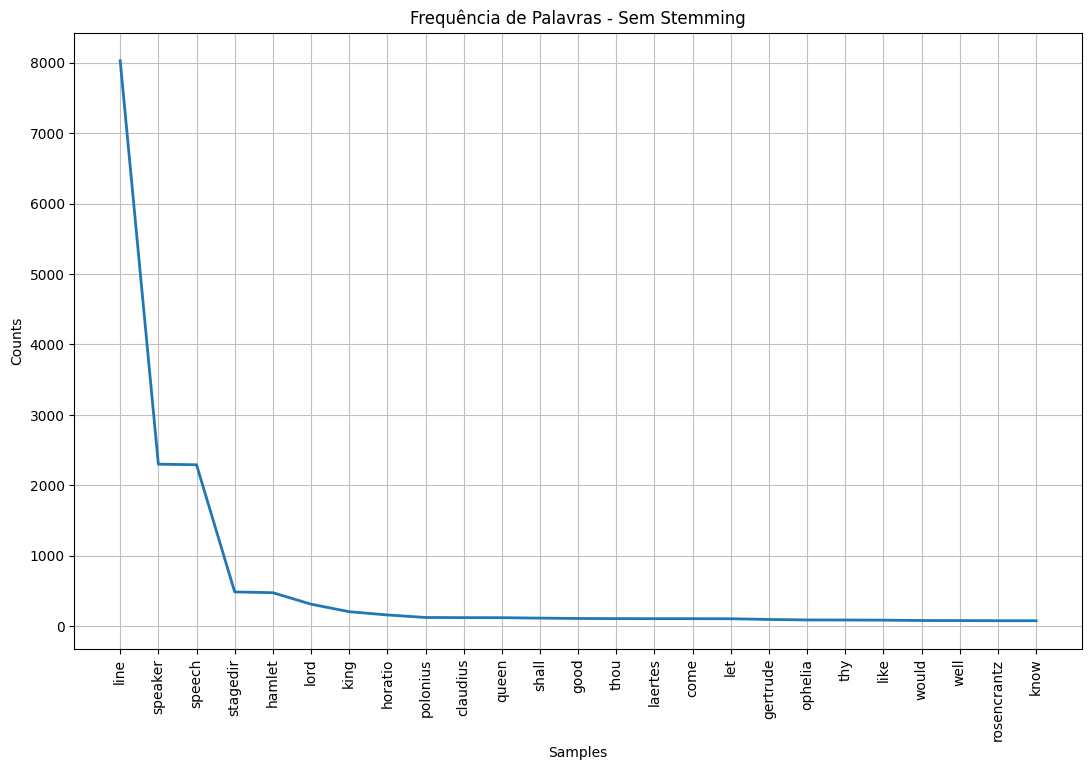

<Axes: title={'center': 'Frequência de Palavras - Sem Stemming'}, xlabel='Samples', ylabel='Counts'>

In [41]:
plt.figure(figsize = (13, 8))
freq_sem_stem.plot(25, title = "Frequência de Palavras - Sem Stemming")

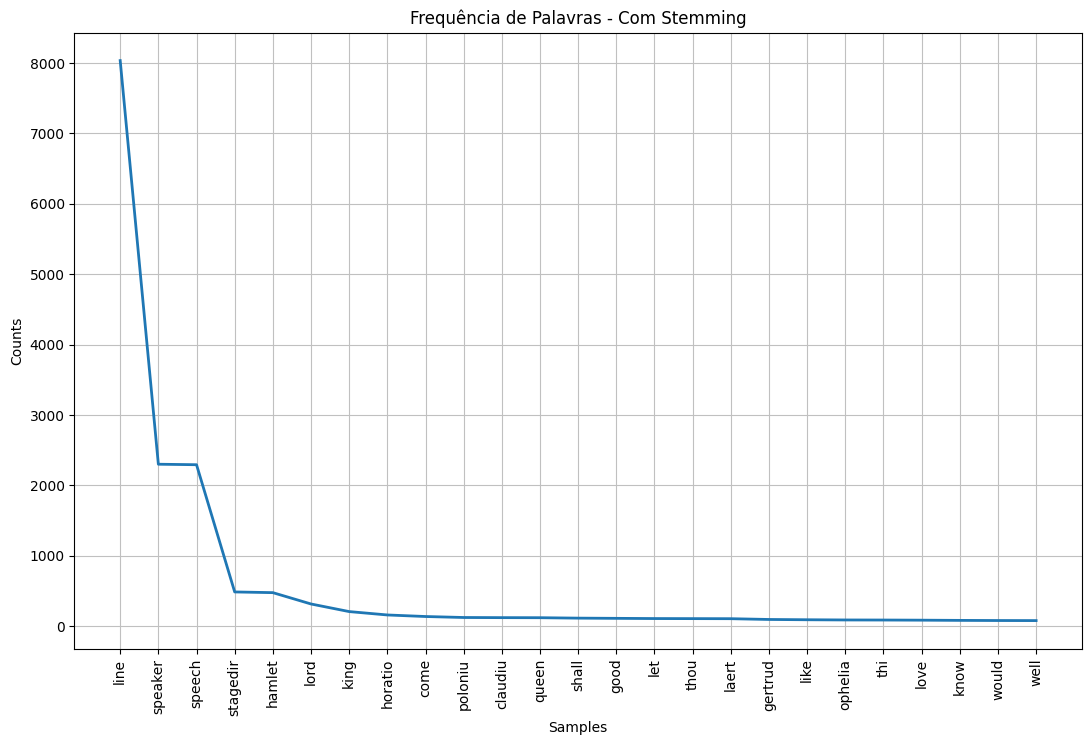

<Axes: title={'center': 'Frequência de Palavras - Com Stemming'}, xlabel='Samples', ylabel='Counts'>

In [42]:
plt.figure(figsize = (13, 8))
freq_com_stem.plot(25, title = "Frequência de Palavras - Com Stemming")